# 7장 머신러닝 알고리즘과 모델

## 7.3 가우시안 나이브 베이지안((Gaussian naive Bayesian)

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

In [2]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()

((3997, 26), (3997,))

,tv9,drama3,지역_부산울산경남,지역_경기인천,tv4,drama4,직업_무직기타,지역_대구경북,tv15,tv8,...,모바일평일,tv3,tv2,성별_2,주거형태,직업_기능노무직,drama9,drama8,직업_학생재수생,tv7
0,2.30963,-0.396918,0,0,0.638663,-1.740786,0,0,-0.067259,-0.338545,...,1.451424,-0.637110,-0.728984,0,-2.520823,0,3.407174,-0.371179,1,-0.226117
1,-0.43297,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,-0.863126,1.569587,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,0.858863
2,2.30963,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,0.525604,-0.637110,-0.728984,0,1.953302,0,-0.293498,-0.371179,1,-0.226117
3,2.30963,-0.396918,0,0,-1.565772,0.824347,0,0,-0.067259,-0.338545,...,-0.400216,-0.637110,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,-0.226117
4,2.30963,-0.396918,0,0,0.638663,-0.458220,0,0,-0.067259,-0.338545,...,1.451424,-0.637110,-0.728984,0,-0.283760,0,-0.293498,-0.371179,1,0.858863


In [3]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((3197, 26), (800, 26))

((3197,), (800,))

In [4]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(1357)

In [5]:
kf = KFold(n_splits=5)
model = GaussianNB()
params = {'var_smoothing': [1e-9, 1e-8,1e-7, 1e-6, 1e-5]}
grid = GridSearchCV(model, param_grid=params, cv=kf, scoring = 'recall_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='recall_macro')

분류임계값 0.5 이상 총 소비자는 354 명


<Figure size 1080x216 with 0 Axes>

(array([215., 271., 315., 377., 446., 503., 547., 597., 666., 800.]),
 array([1.2246129e-201, 1.0000000e-001, 2.0000000e-001, 3.0000000e-001,
        4.0000000e-001, 5.0000000e-001, 6.0000000e-001, 7.0000000e-001,
        8.0000000e-001, 9.0000000e-001, 1.0000000e+000]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '분류임계값')

Text(0, 0.5, '부적합업체 예측 누적 수')

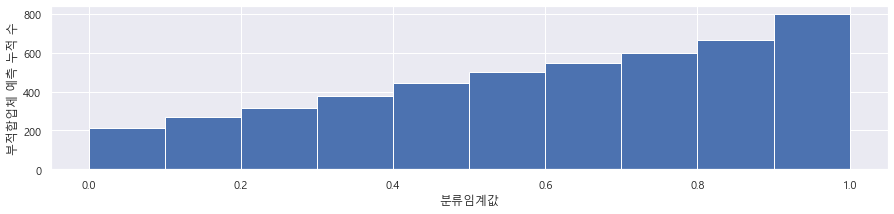

In [6]:
y_predict = grid.predict(X_test); y_proba = grid.predict_proba(X_test)
cut_off = 0.5
print(f'분류임계값 {cut_off} 이상 총 소비자는 {sum((y_proba[:, 1] >= cut_off)*1)} 명')
plt.figure(figsize=(15, 3)); plt.hist(y_proba[:, 1], cumulative=True)
plt.xlabel('분류임계값'); plt.ylabel('부적합업체 예측 누적 수')

In [7]:
data = pd.DataFrame(y_proba, columns =['비구매확률', '구매확률']).round(2)
data['분류'] = y_predict
data.head()

,비구매확률,구매확률,분류
0,0.00,1.00,1
1,0.44,0.56,1
2,0.22,0.78,1
3,0.99,0.01,0
4,0.87,0.13,0


(array([215.,  56.,  44.,  62.,  69.,  57.,  44.,  50.,  69., 134.]),
 array([1.2246129e-201, 1.0000000e-001, 2.0000000e-001, 3.0000000e-001,
        4.0000000e-001, 5.0000000e-001, 6.0000000e-001, 7.0000000e-001,
        8.0000000e-001, 9.0000000e-001, 1.0000000e+000]),
 <a list of 10 Patch objects>)

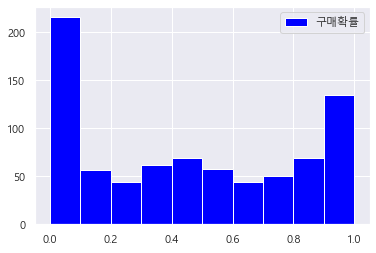

(array([134.,  69.,  50.,  44.,  57.,  69.,  62.,  44.,  56., 215.]),
 array([4.78807309e-43, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

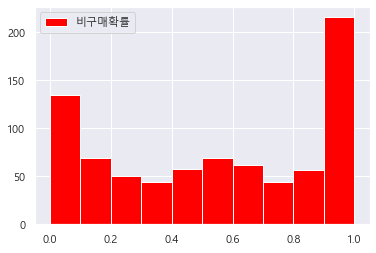

In [8]:
plt.hist(y_proba[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_proba[:, 0], color ='red', label='비구매확률'); plt.legend()

In [9]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       522
           1       0.43      0.54      0.48       278

    accuracy                           0.59       800
   macro avg       0.57      0.58      0.57       800
weighted avg       0.61      0.59      0.60       800



In [10]:
grid.best_estimator_.score(X_test, y_test)
grid.score(X_test, y_test).round(2)
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

0.5875

0.58

,params,mean_test_score,rank_test_score
4,{'var_smoothing': 1e-05},0.617729,1
1,{'var_smoothing': 1e-08},0.616468,2
2,{'var_smoothing': 1e-07},0.616261,3
3,{'var_smoothing': 1e-06},0.616044,4
0,{'var_smoothing': 1e-09},0.614547,5


In [11]:
from sklearn.metrics import roc_auc_score, average_precision_score
auc = roc_auc_score(y_test, y_proba[:,1])
ap = average_precision_score(y_test, y_proba[:,1])
print(f'AUROC :{round(auc * 100, 2)}, AP Mean :{round(ap * 100, 2)}')

AUROC :62.37, AP Mean :48.96


In [12]:
from joblib import dump, load
dump(model, '../output/gnb.joblib')

['../output/gnb.joblib']

In [13]:
df = pd.DataFrame({'성별' : ['남성', '남성', '남성', '남성','여성','여성','여성','여성'],
                  '신장' : [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75], # feet
                  '무게' : [180, 190, 170, 165, 100, 150, 130, 150],  # pounds
                  '발의크기' : [12, 11, 12, 10, 6, 8, 7, 9]})             # inches
data = df.groupby('성별')['신장', '무게', '발의크기'].agg(['mean','var']).reset_index('성별')
df = df.merge(data, on='성별')
df = df.append({'신장':6, '무게':130, '발의크기':8}, ignore_index=True)
df

,성별,신장,무게,발의크기,"(신장, mean)","(신장, var)","(무게, mean)","(무게, var)","(발의크기, mean)","(발의크기, var)"
0,남성,6.00,180.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
1,남성,5.92,190.0,11.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
2,남성,5.58,170.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
3,남성,5.92,165.0,10.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
4,여성,5.00,100.0,6.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
5,여성,5.50,150.0,8.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
6,여성,5.42,130.0,7.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
7,여성,5.75,150.0,9.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
8,NaN,6.00,130.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data
mu_m, sigma_m = data.iloc[0,1], np.sqrt(data.iloc[0,2]); (mu_m, sigma_m**2)
mu_f, sigma_f = data.iloc[1,1], np.sqrt(data.iloc[1,2]); (mu_f, sigma_f**2)

성별      신장                무게               발의크기          
         mean       var    mean         var   mean       var
0  남성  5.8550  0.035033  176.25  122.916667  11.25  0.916667
1  여성  5.4175  0.097225  132.50  558.333333   7.50  1.666667

(5.855, 0.0350333333333333)

(5.4175, 0.09722499999999992)

In [15]:
import scipy.stats
like_m = scipy.stats.norm(mu_m, sigma_m).pdf(6)
print('남성 우도는 {0:.3f}이고, 남성일 사후확률은 {1:.2f}'.format(like_m,0.5*like_m))
like_f = scipy.stats.norm(mu_f, sigma_f).pdf(6)
print('여성 우도는 {0:.3f}이고, 여성일 사후확률은 {1:.2f}'.format(like_f,0.5*like_f))

남성 우도는 1.579이고, 남성일 사후확률은 0.79
여성 우도는 0.223이고, 여성일 사후확률은 0.11


In [16]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

Text(6.0, 1.5788831832641042, '     Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 남성일 가능성(Likelihood)')

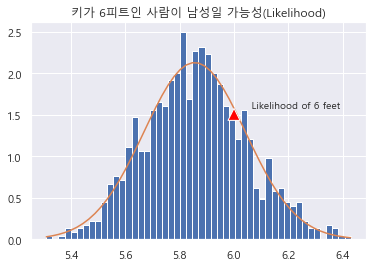

In [17]:
s = np.random.normal(mu_m, sigma_m, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('     Likelihood of 6 feet', xy=(6., like_m), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_m * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_m)**2 / (2*sigma_m**2)))
plt.title('키가 6피트인 사람이 남성일 가능성(Likelihood)')

Text(6.0, 0.2234587268448157, '  Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 여성일 가능성(Likelihood)')

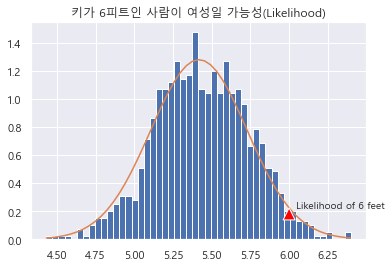

In [18]:
s = np.random.normal(mu_f, sigma_f, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('  Likelihood of 6 feet', xy=(6., like_f), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_f * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_f)**2 / (2*sigma_f**2)))
plt.title('키가 6피트인 사람이 여성일 가능성(Likelihood)')

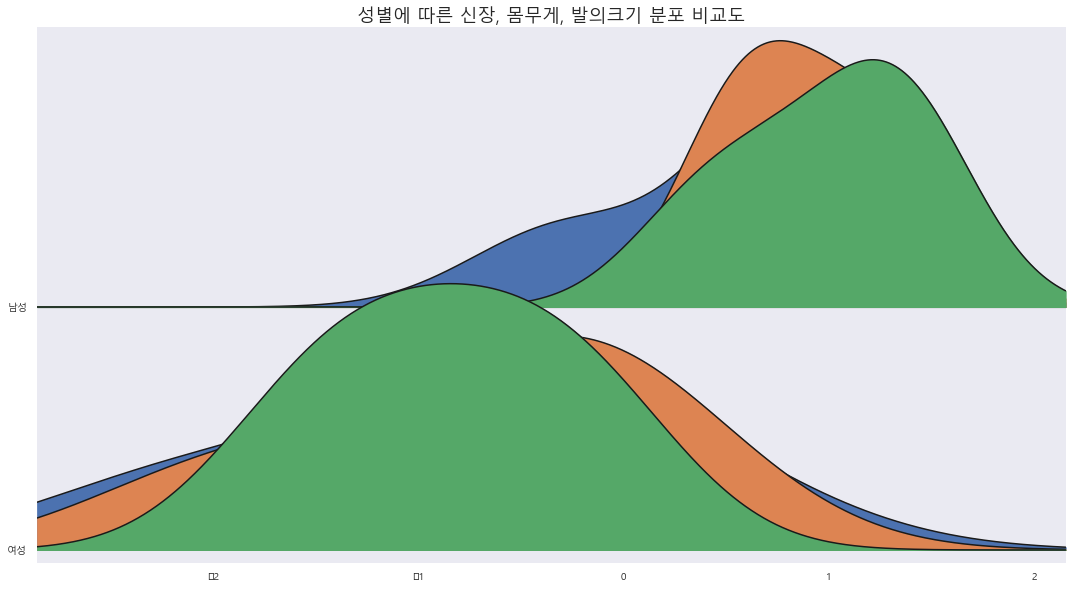

In [19]:
import joypy
plt.rcParams['font.family']='Malgun Gothic'
df[['신장','무게','발의크기']]= StandardScaler().fit_transform(df[['신장', '무게', '발의크기']])
fig, axes = joypy.joyplot(df,column = ['신장', '무게', '발의크기'],
                          by = '성별', ylim = 'own', figsize = (15,8))
plt.title('성별에 따른 신장, 몸무게, 발의크기 분포 비교도', fontsize = 18);

In [20]:
import math
mh= ((1/math.sqrt(2*math.pi*data.iloc[0,2])) * 
     math.exp(-1*(6 - data.iloc[0,1])**2/(2*data.iloc[0,2])))
mw= ((1/math.sqrt(2*math.pi*data.iloc[0,4])) * 
     math.exp(-1*(130 - data.iloc[0,3])**2/(2*data.iloc[0,4])))
mf=((1/math.sqrt(2*math.pi*data.iloc[0,6])) * 
    math.exp(-1*(8 - data.iloc[0,5])**2/(2*data.iloc[0,6])))
print('남성일 사후확률 {0:.5f}'.format(mh* mw* mf*0.5))

wh= ((1/math.sqrt(2*math.pi*data.iloc[1,2])) * 
     math.exp(-1*(6 - data.iloc[1,1])**2/(2*data.iloc[1,2])))
ww= ((1/math.sqrt(2*math.pi*data.iloc[1,4])) * 
     math.exp(-1*(130 - data.iloc[1,3])**2/(2*data.iloc[1,4])))
wf=((1/math.sqrt(2*math.pi*data.iloc[1,6])) * 
    math.exp(-1*(8 - data.iloc[1,5])**2/(2*data.iloc[1,6])))
print('여성일 사후확률 {0:.5f}'.format(wh* ww* wf*0.5))

남성일 사후확률 0.00000
여성일 사후확률 0.00054


## 7.4 로지스틱 회귀(Logistic regression)

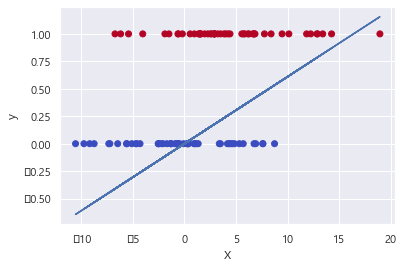

In [21]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); 

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


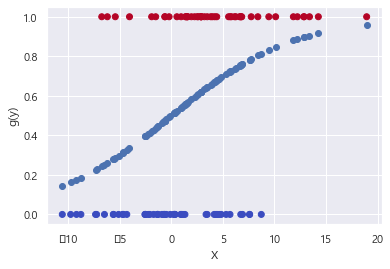

In [22]:
y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

In [23]:
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); X.shape
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis] 

(100,)

(100, 1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
y_predict = LinearRegression().fit(X,y).predict(X)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit[:,np.newaxis])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

<Figure size 1080x576 with 0 Axes>

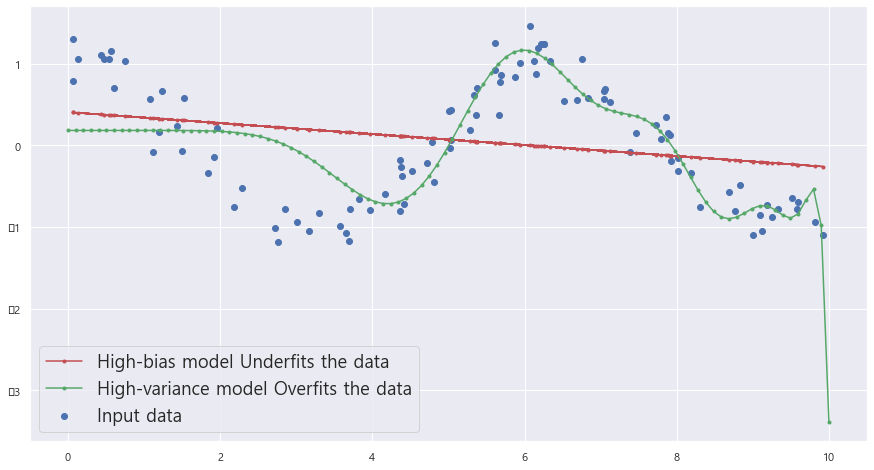

In [25]:
plt.figure(figsize=(15, 8));  plt.rc('legend', fontsize=18)
plt.scatter(X, y, label='Input data'); plt.legend()
plt.plot(X, y_predict, 'r.-', label='High-bias model Underfits the data'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='High-variance model Overfits the data'); plt.legend()

In [26]:
new_data = np.array([[11.00]])
poly_model.predict(new_data)
LinearRegression().fit(X,y).predict(new_data)

array([-4460.00850736])

array([-0.33203872])

In [27]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

<Figure size 1080x576 with 0 Axes>

(-4.0, 4.0)

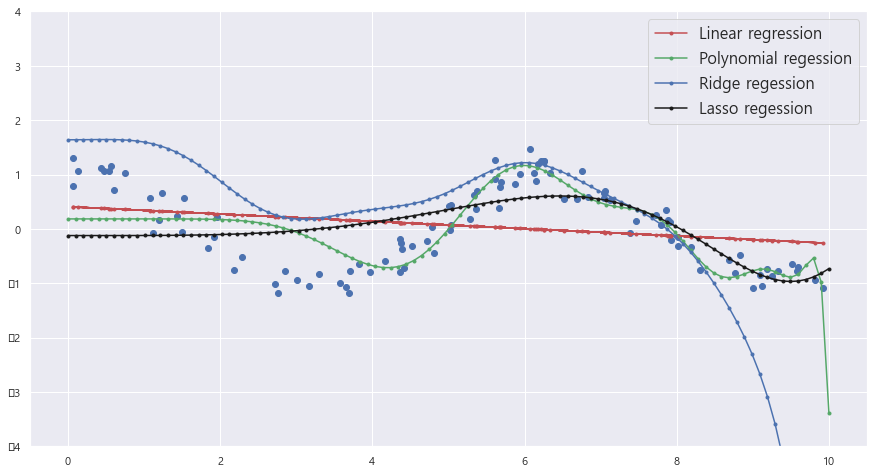

In [28]:
plt.figure(figsize=(15, 8)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

In [29]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [30]:
from sklearn.linear_model import LogisticRegression
np.random.seed(1357)

In [31]:
kf = KFold(n_splits=5)
model = LogisticRegression(random_state=11)
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [32]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

In [33]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.590
test score: 0.582
optimal parameter: {'penalty': 'l2', 'C': 78.47599703514607}


In [34]:
model= LogisticRegression(random_state=11, penalty= 'l2', C=78.47599703514607)
model.fit(X_train, y_train)
model.coef_
model.intercept_

LogisticRegression(C=78.47599703514607, random_state=11)

array([[ 0.14612211,  0.14816874,  0.95964552, -0.32670506,  0.24409009,
        -0.0962653 , -0.16923982, -0.87230212, -0.09300459,  0.03862797,
         0.09878554, -0.01201194, -0.14776981,  0.11423515,  0.1256829 ,
        -0.35554134, -0.05206177, -0.08358335, -0.09381483, -0.07557643,
         0.0386672 , -0.12918966,  0.05436039, -0.0097597 ,  0.01613283,
        -0.12037179]])

array([-0.43178542])

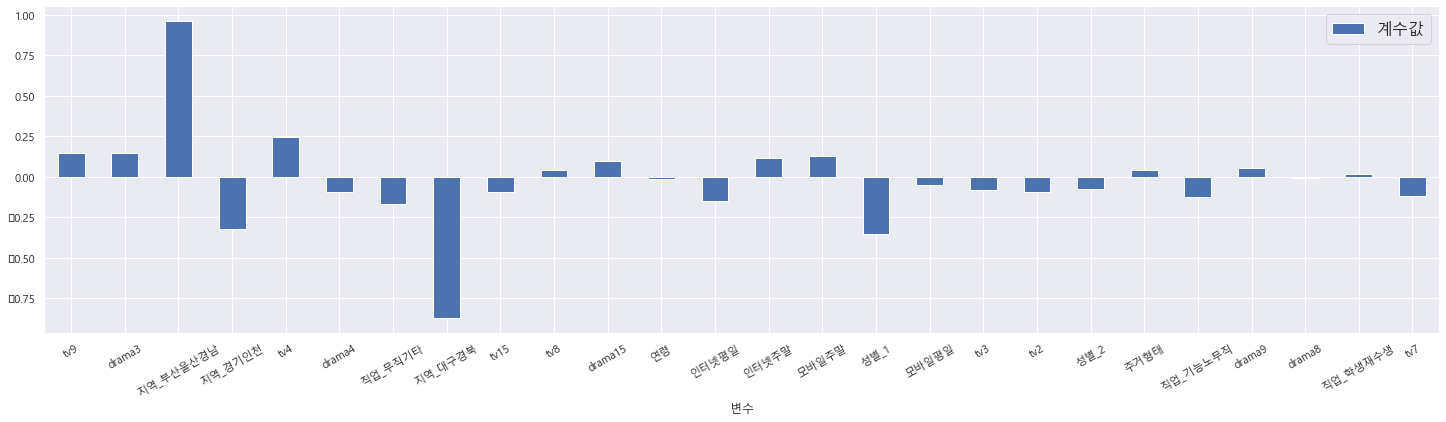

In [35]:
data = zip(X_train.columns, np.squeeze(model.coef_))
(pd.DataFrame(data, columns =['변수', '계수값']).set_index('변수').
plot.bar(rot='30', figsize=(25,6)))

In [36]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.6775

(array([ 50., 120., 118., 198., 125.,  73.,  55.,  28.,  23.,  10.]),
 array([0.05396198, 0.13254346, 0.21112494, 0.28970643, 0.36828791,
        0.44686939, 0.52545087, 0.60403236, 0.68261384, 0.76119532,
        0.83977681]),
 <a list of 10 Patch objects>)

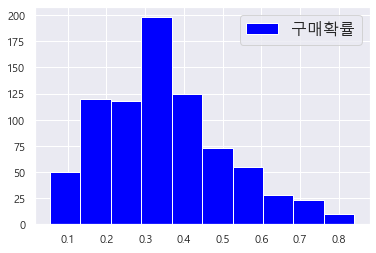

(array([ 10.,  23.,  28.,  55.,  73., 125., 198., 118., 120.,  50.]),
 array([0.16022319, 0.23880468, 0.31738616, 0.39596764, 0.47454913,
        0.55313061, 0.63171209, 0.71029357, 0.78887506, 0.86745654,
        0.94603802]),
 <a list of 10 Patch objects>)

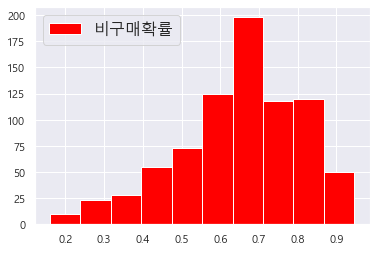

In [37]:
y_proba = model.predict_proba(X_test)
plt.hist(y_proba[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_proba[:, 0], color ='red', label='비구매확률'); plt.legend()

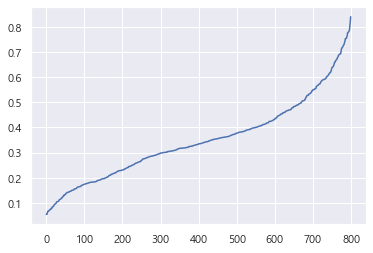

In [38]:
plt.plot(np.arange(len(y_test)), np.sort(y_proba[:,1]))

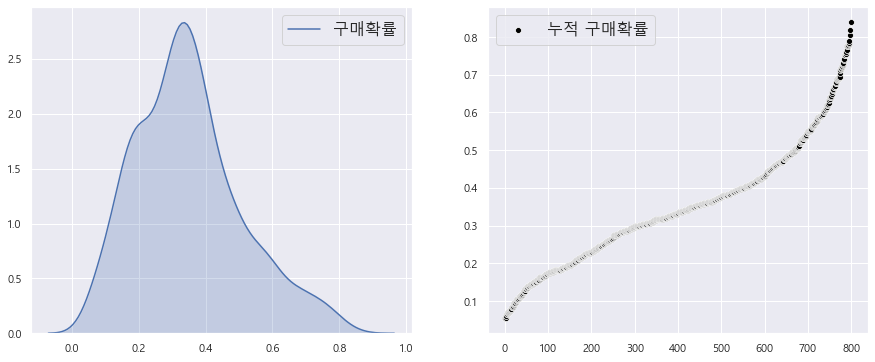

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
sns.kdeplot(np.sort(y_proba[:,1]), shade=True, label='구매확률', ax=ax[0])
x=np.arange(len(y_test)); y=np.sort(y_proba[:,1])
sns.scatterplot(x=x, y=y, color='black', label='누적 구매확률', ax=ax[1])

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       522
           1       0.58      0.27      0.37       278

    accuracy                           0.68       800
   macro avg       0.64      0.58      0.58       800
weighted avg       0.66      0.68      0.64       800



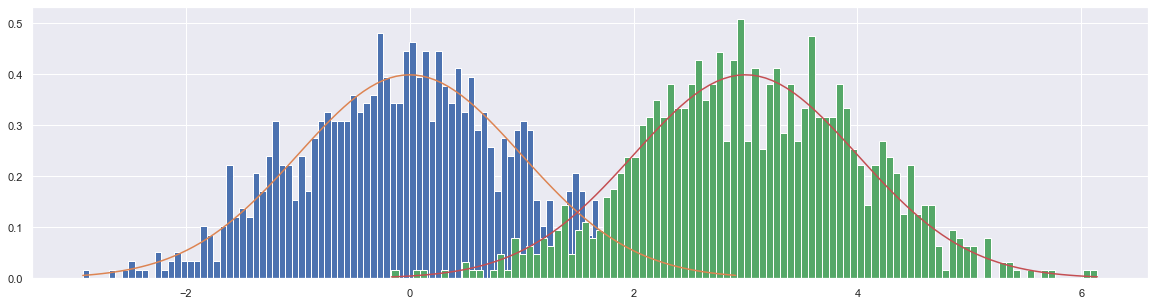

In [41]:
sns.set()
import scipy as sp
import scipy.stats
mu_h0, sigma_h0 = 0, 1
mu_h1, sigma_h1 = 3, 1
fig, ax = plt.subplots(figsize=(20,5))
n, bins, ignored = ax.hist(np.random.normal(mu_h0, sigma_h0, 1000), 100, density=1) # 100 bins
plt.plot(bins, 1/(sigma_h0 * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_h0)**2 / (2*sigma_h0**2)))

n, bins, ignored = ax.hist(np.random.normal(mu_h1, sigma_h1, 1000), 100, density=1) 
plt.plot(bins, 1/(sigma_h1 * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_h1)**2 / (2*sigma_h1**2)))

In [42]:
cdf_h1 = scipy.stats.norm(mu_h1, sigma_h1).cdf(6.15) # 대립가설(h1)
print(f'False Negative Rate((beta error)는 {(cdf_h1*100).round(2)}% 이다')

False Negative Rate((beta error)는 99.92% 이다


In [43]:
dump(grid.best_estimator_, '../output/lgr.joblib')

['../output/lgr.joblib']

In [44]:
model = load('../output/lgr.joblib')
model.get_params()['solver']

'lbfgs'

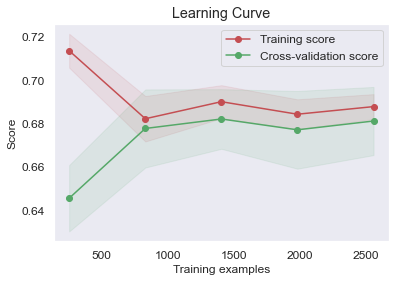

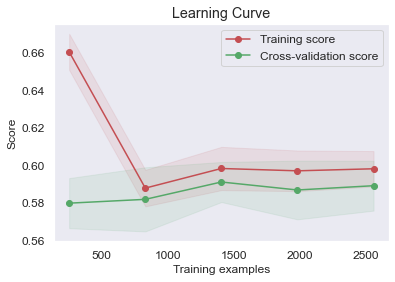

In [45]:
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

## 7.5 SVM(Support Vector Machine)

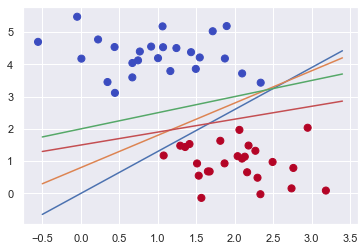

In [46]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');
X_fit = np.arange(-0.5, 3.5, 0.1)
plt.plot(X_fit, X_fit*1.3); plt.plot(X_fit, 0.8+X_fit*1);
plt.plot(X_fit, 2+X_fit*0.5);plt.plot(X_fit, 1.5+X_fit*0.4)

In [47]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30); y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], 
               alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                 s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim); ax.set_ylim(ylim)

SVC(kernel='linear', random_state=11)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

array([[ 0.22967329, -1.37758262]])

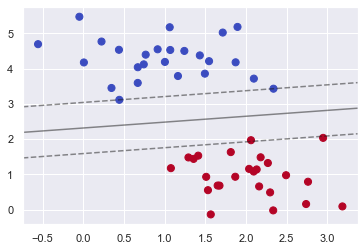

In [48]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=11)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);
model.support_vectors_; 
model.coef_

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

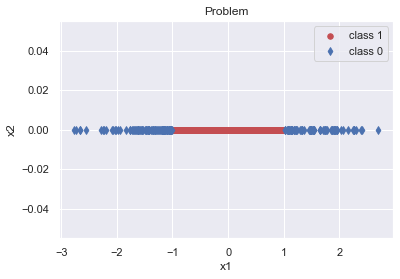

In [49]:
sns.set(); np.random.seed(0)
X = np.random.randn(500)
tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]
X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Problem')

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

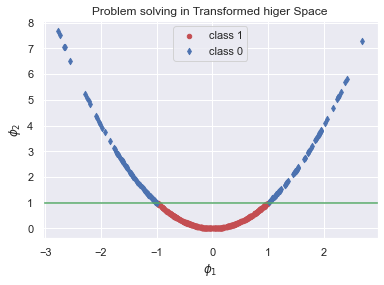

In [50]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=20)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=20)
plt.legend(); plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$')
plt.title('Problem solving in Transformed higer Space')
plt.axhline(y= tr, color='g', linestyle='-')

In [51]:
x = np.array([1,2,3]); y = np.array([4,5,6])
x_t = x.reshape(-1,1); x = x.reshape(1,-1)
q_x = x_t@x
q_x

y_t = y.reshape(-1,1); y = y.reshape(1,-1)
q_y = y_t@y
q_y

q_x * q_y
(q_x * q_y).sum()

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[16, 20, 24],
       [20, 25, 30],
       [24, 30, 36]])

array([[ 16,  40,  72],
       [ 40, 100, 180],
       [ 72, 180, 324]])

1024

In [52]:
x = np.array([1,2,3]); y = np.array([4,5,6])
sum((x*y))**2 # kernel function
np.dot(x,y)**2

1024

1024

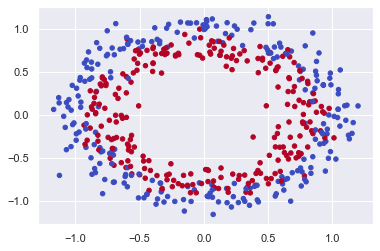

In [53]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

<Figure size 576x432 with 0 Axes>

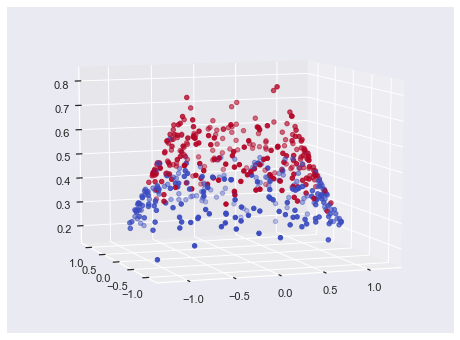

In [54]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

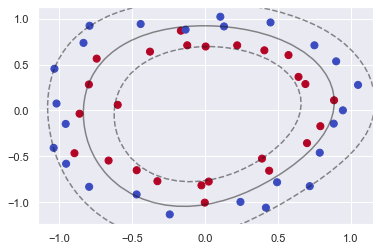

In [55]:
X, y = make_circles(n_samples=50, random_state=11, noise=0.1)
model = SVC(kernel='rbf')
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

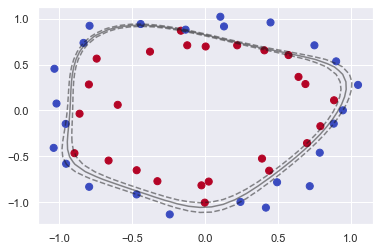

In [56]:
model = SVC(kernel='rbf', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

In [57]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [58]:
from sklearn.svm import SVC
np.random.seed(1357)

In [59]:
kf = KFold(n_splits=5)
params = {'C': np.arange(0.001, 1000, 10),
          'gamma': np.arange(0.001, 1000, 10),
          'kernel': ['linear', 'rbf']}
svc = SVC(max_iter=1000, random_state=11)
grid=RandomizedSearchCV(svc, params, cv=kf, 
                        scoring='recall_macro', verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.4s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(max_iter=1000, random_state=11),
                   param_distributions={'C': array([1.00000e-03, 1.00010e+01, 2.00010e+01, 3.00010e+01, 4.00010e+01,
       5.00010e+01, 6.00010e+01, 7.00010e+01, 8.00010e+01, 9.00010e+01,
       1.00001e+02, 1.10001e+02, 1.20001e+02, 1.30001e+02, 1.40001e+02,
       1.50001e+02, 1.60001e+...
       7.50001e+02, 7.60001e+02, 7.70001e+02, 7.80001e+02, 7.90001e+02,
       8.00001e+02, 8.10001e+02, 8.20001e+02, 8.30001e+02, 8.40001e+02,
       8.50001e+02, 8.60001e+02, 8.70001e+02, 8.80001e+02, 8.90001e+02,
       9.00001e+02, 9.10001e+02, 9.20001e+02, 9.30001e+02, 9.40001e+02,
       9.50001e+02, 9.60001e+02, 9.70001e+02, 9.80001e+02, 9.90001e+02]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='recall_macro', verbose=True)

In [60]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.525
test score: 0.508
optimal parameter: {'kernel': 'linear', 'gamma': 660.001, 'C': 480.001}


In [61]:
model = grid.best_estimator_
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
y_predict[0:10]
y_scores[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

array([ 1.58360753,  0.74373605, -0.59500297,  0.89440668,  0.92966665,
        1.31139209,  2.20901046,  1.70537498, -0.6654649 , -3.2768186 ])

              precision    recall  f1-score   support

           0       0.66      0.53      0.59       522
           1       0.36      0.49      0.41       278

    accuracy                           0.52       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.55      0.52      0.53       800



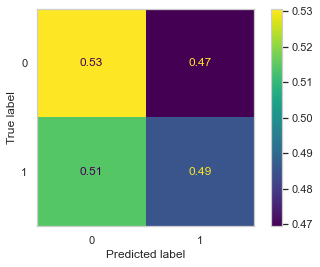

In [62]:
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 53.03
AP Mean : 37.88


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.38')

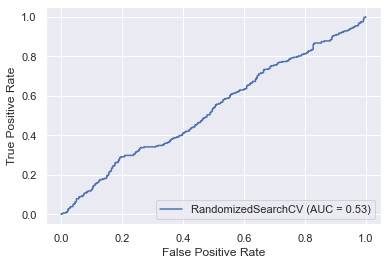

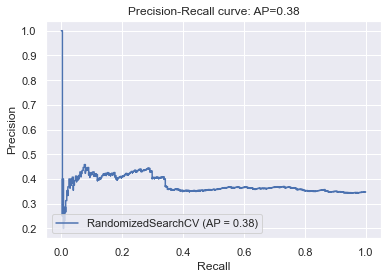

In [67]:
sns.set()
from sklearn.metrics import plot_precision_recall_curve
svc_disp = plot_roc_curve(grid, X_test, y_test)
ap = average_precision_score(y_test, y_scores)
svc_disp = plot_precision_recall_curve(grid, X_test, y_test)
svc_disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(ap))

In [65]:
from joblib import dump, load
dump(model, '../output/svc.joblib')

['../output/svc.joblib']